# Jupyter notebook to reproduce some of the results of Chapter 6 of the thesis (the rest of the codes can asked from Malte Roentgen: info@mroentgen.de)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'



def fibWord(n): #consists of N=Fibonumb((n+2)) letters
    Sn_1 = "0"
    Sn = "01"
    tmp = "" 
    for i in range(2, n + 1): 
        tmp = Sn 
        Sn += Sn_1 
        Sn_1 = tmp 
    return Sn 

def Fibonumb(n): 
    if n<0: 
        print("Incorrect input") 
    # First Fibonacci number is 0 
    elif n==0: 
        return 0
    # Second Fibonacci number is 1 
    elif n==1: 
        return 1
    else: 
        return Fibonumb(n-1)+Fibonumb(n-2)

In [2]:
def ETheor(h,VA,VB,VC):
    #t's

    #VA cluster

    tba=h**2/(VA-VC)
    tsa=h
    twa=h**2/(VA-VB)

    #VB cluster

    tbb=-h**5/2/(VB-VA)**4
    tsb=h**2/(VB-VA)
    twb=h**3/(VB-VA)**2

    #VC cluster

    tbc=0
    tsc=h**6/4/(VB-VA+2*h)**5
    twc=h**9/(VB-VA+2*h)**8/16

    #VA cluster
    E4mA1=1/np.sqrt(2)*np.sqrt(tba**2+2*tsa**2+np.sqrt((tba**2+2*tsa**2)**2-4*tsa**4))
    E4mA2=1/np.sqrt(2)*np.sqrt(tba**2+2*tsa**2-np.sqrt((tba**2+2*tsa**2)**2-4*tsa**4))
    E4mA3=-1/np.sqrt(2)*np.sqrt(tba**2+2*tsa**2+np.sqrt((tba**2+2*tsa**2)**2-4*tsa**4))
    E4mA4=-1/np.sqrt(2)*np.sqrt(tba**2+2*tsa**2-np.sqrt((tba**2+2*tsa**2)**2-4*tsa**4))
    E2mA1=tsa
    E2mA2=-tsa


    #VA Cluster EaA hoppings

    # a11,a21,a31,a41=1,E4mA1/tsa,tba/tsa*E4mA1**2/(E4mA1**2-tsa**2),tba*E4mA1/(E4mA1**2-tsa**2)
    # a12,a22,a32,a42=1,E4mA2/tsa,tba/tsa*E4mA2**2/(E4mA2**2-tsa**2),tba*E4mA2/(E4mA2**2-tsa**2)
    # a13,a23,a33,a43=1,E4mA3/tsa,tba/tsa*E4mA3**2/(E4mA3**2-tsa**2),tba*E4mA3/(E4mA3**2-tsa**2)
    # a14,a24,a34,a44=1,E4mA4/tsa,tba/tsa*E4mA4**2/(E4mA4**2-tsa**2),tba*E4mA4/(E4mA4**2-tsa**2)

    a11,a21,a31,a41 =1, E4mA1/tsa, (E4mA1**2-tsa**2)/(tba*tsa), E4mA1/tsa**2*(E4mA1**2-tsa**2-tba**2)/tba
    a12,a22,a32,a42 =1, E4mA2/tsa, (E4mA2**2-tsa**2)/(tba*tsa), E4mA2/tsa**2*(E4mA2**2-tsa**2-tba**2)/tba
    a13,a23,a33,a43 =1, E4mA3/tsa, (E4mA3**2-tsa**2)/(tba*tsa), E4mA3/tsa**2*(E4mA3**2-tsa**2-tba**2)/tba
    a14,a24,a34,a44 =1, E4mA4/tsa, (E4mA4**2-tsa**2)/(tba*tsa), E4mA4/tsa**2*(E4mA4**2-tsa**2-tba**2)/tba

    N1=np.sqrt(a11**2+a21**2+a31**2+a41**2)
    N2=np.sqrt(a12**2+a22**2+a32**2+a42**2)
    N3=np.sqrt(a13**2+a23**2+a33**2+a43**2)
    N4=np.sqrt(a14**2+a24**2+a34**2+a44**2)

    TA=-twa**2/(2*tsa)
    TB=-twa**2*(a31/(N1*E4mA1)+a32/(N2*E4mA2)+a33/(N3*E4mA3)+a34/(N4*E4mA4))

    EaA1=0
    EaA2=TA
    EaA3=-TA

    #VA Cluster Ea4M hoppings


    TA4M1=a41/N1*twa**2/E4mA1
    TB4M1=a41/N1*twa**4*tsa/(E4mA1**2-tsa**2)/E4mA1**2

    TA4M2=a42/N2*twa**2/E4mA2
    TB4M2=a42/N2*twa**4*tsa/(E4mA2**2-tsa**2)/E4mA2**2

    TA4M3=a43/N3*twa**2/E4mA3
    TB4M3=a43/N3*twa**4*tsa/(E4mA3**2-tsa**2)/E4mA3**2

    TA4M4=a44/N4*twa**2/E4mA4
    TB4M4=a44/N4*twa**4*tsa/(E4mA4**2-tsa**2)/E4mA4**2




    #VB cluster
    E4mB1=1/np.sqrt(2)*np.sqrt(tbb**2+2*tsb**2+np.sqrt((tbb**2+2*tsb**2)**2-4*tsb**4))
    E4mB2=1/np.sqrt(2)*np.sqrt(tbb**2+2*tsb**2-np.sqrt((tbb**2+2*tsb**2)**2-4*tsb**4))
    E4mB3=-1/np.sqrt(2)*np.sqrt(tbb**2+2*tsb**2+np.sqrt((tbb**2+2*tsb**2)**2-4*tsb**4))
    E4mB4=-1/np.sqrt(2)*np.sqrt(tbb**2+2*tsb**2-np.sqrt((tbb**2+2*tsb**2)**2-4*tsb**4))
    E2mB1=tsb
    E2mB2=-tsb

    E=sorted(np.array([VA+E4mA1+TA4M1,VA+E4mA1-TA4M1,VA+E4mA2+TA4M2,VA+E4mA2-TA4M2,VA+E4mA3+TA4M3,VA+E4mA3-TA4M3,VA+E4mA4+TA4M4,VA+E4mA4-TA4M4,VA+E2mA1,VA+E2mA2,VA+EaA1,VA+EaA2,VA+EaA3,VB+E4mB1,VB+E4mB2,VB+E4mB3,VB+E4mB4,VB+E2mB1,VB+E2mB2,VC,VC]))

    return E

def numeigs(h,VA,VB,VC):

    v=np.zeros(F)

    for i in range(F):

        if ch[i]=='0':

            v[i]=VA

        if ch[i]=='1':

            v[i]=VB

    #Construct Hamiltonian

    Hd=np.zeros([F,F], dtype=np.complex128)
    t=np.zeros([F,F], dtype=np.complex128)
    for i in range(F):
        Hd[i,i]=v[i]
        if i < F-1:
            t[i,i+1]=h
            t[i+1,i]=h.conjugate()

    t[0,F-1]=t[F-1,0]=h
    H=Hd+t

    HH=Hd+t

    HH[1,1]=VC
    HH[9,9]=VC
    
    eigval=np.linalg.eigvals(HH).real
    idx = eigval.argsort() 
    eigval = eigval[idx]
    
    return eigval

## Calculating the values of the energy spectrum derived analytically and comparing them to direct numerically calculated eigenvalues

In [4]:
N=6 #N^th generation word
F=Fibonumb(N+2) #amount of sites in chain
ch=fibWord(N)

h= -0.5
VB1=6
VB2=8
params1=(-0.5,4,VB1,VB1+2*h)
params2=(-0.5,4,VB2,VB2+2*h)

E=ETheor(*params1)
E2=ETheor(*params2)

eigval=numeigs(*params1)
eigval2=numeigs(*params2)

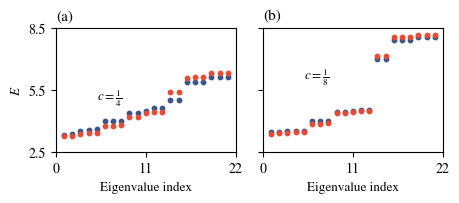

In [20]:
fig, ax= plt.subplots(1,2, figsize=(4.7,2))
plt.tight_layout(pad=0 , w_pad=1)


ax[0].scatter(np.arange(1,F+1), E, s=10, c="#3C5488FF", alpha=1);
ax[0].scatter(np.arange(1,F+1),eigval, s=10,c="#E64B35FF")
ax[1].scatter(np.arange(1,F+1), E2, s=10, c="#3C5488FF", alpha=1);
ax[1].scatter(np.arange(1,F+1),eigval2, s=10,c="#E64B35FF")

ftt = 11 
ft = 8.5
fz = 9.5

ax[0].text(5,5, "$c=\\frac{1}{4}$", fontsize=fz)
ax[1].text(5,6, "$c=\\frac{1}{8}$", fontsize=fz)

xtik = np.linspace(0, F+1, 3)
ytik = np.linspace(2.5, 8.5, 3)
xlab = [f"{xtik[i]:.0f}" for i in range(len(xtik))]
ylab = [f"{ytik[i]:.1f}" for i in range(len(ytik))]
    
for axs in ax:
    axs.set_xticks(xtik, xlab)
    axs.set_yticks(ytik, ylab)
    axs.set_xlabel("Eigenvalue index", fontsize=fz)
    
ax[0].set_ylabel("$E$", fontsize=fz)
ax[1].yaxis.set_tick_params(labelleft=False)

for axs in ax:
    axs.set_ylim(2.5,8.5)
    
plt.tight_layout()
    
dicts={"(a)": ax[0], "(b)": ax[1]}

for key, axs in dicts.items():
    axs.set_title(key, loc='left', 
            fontsize=ftt)
    

    
# plt.savefig("ComparisonFigGood.pdf", bbox_inches="tight", dpi=600)